In [7]:
!pip install numpy
!pip install matplotlib

     ---------------------------------------- 7.5/7.5 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 4.6 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     -------------------------------------- 56.2/56.2 KB 977.9 kB/s eta 0:00:00
     -------------------------------------- 429.4/429.4 KB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 3.8 MB/s eta 0:00:00


Learned parameters:
theta0 = 0.4430544437585311
theta1 = 0.8651805979950009


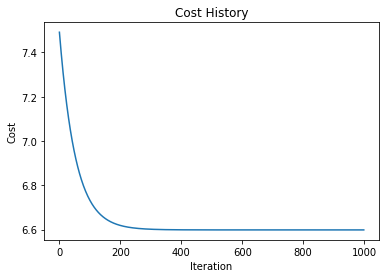

In [8]:
import numpy as np

def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)
    cost_history = []
    
    for _ in range(num_iterations):
        # Calculate predictions
        y_pred = np.dot(X, theta)
        
        # Calculate the difference between predictions and actual values
        error = y_pred - y
        
        # Calculate the gradient
        gradient = (1/num_samples) * np.dot(X.T, error)
        
        # Update theta using the learning rate and gradient
        theta -= learning_rate * gradient
        
        # Calculate the cost (mean squared error)
        cost = np.mean(np.square(error))
        cost_history.append(cost)
    
    return theta, cost_history

# Example usage:
# Generate some random data for demonstration
np.random.seed(0)
num_samples = 100
num_features = 2
X = np.random.rand(num_samples, num_features)
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(num_samples)

# Normalize the features (optional but recommended for gradient descent)
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Train the model using gradient descent
theta, cost_history = gradient_descent(X_normalized, y)

# Print the learned parameters
print("Learned parameters:")
print("theta0 =", theta[0])
print("theta1 =", theta[1])

# Plot the cost history
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()